Question 1

1.) The difference between simple linear regression and multiple linear regression is that for simple linear regression uses only one predictor variable, while multiple linear regression uses more than one predictor variable. Both regression models find the best fit line, in the case of simple linear regression it is a straight line, and for multiple linear regression it is plane or hyperplane. Reasons why multiple linear regression models may be more desireable is that it can model more complex relationships due to having more than one predictor variable, and can capture a more realistic relationship between variables. It can also capture interactions and can represent non-linear patterns, generally have greater predictive power than simple linear regression, and it can show how different influence the outcome.

2.) A continuous variable is a numeric variable, and an indicator variable (aka. dummy variable) is a binary variable that represents categorical data by having it equal to 1 if a certain condition is met and 0 if not. There are two main linear forms for simple linear regression:

Simple linear regression with a continuous variable:

y = B0 + B1x
x is the continuous predictor variable, y is the outcome, B0 is the intercept, and B1 is the regression coefficient(slope).

Simple linear regression:

y = B0 + B1z
z is the indicator variable, y is the outcome, B0 is the intercept, and B1 represents the difference in the expected value of y between the two group. When z=0, then the equation becomes y = B0, and if z = 1 then the equation becomes y = B0 +B1z.

    
3.) The change that happens when a single indicator variable is introduced alongside a continuous variable to create a Multiple Linear Regression is that it now results in two parallel lines with the same slope but different intercepts(as opposed to one linear line found in the simple linear regression model); each line represents each group by the indicator variable. The two groups have the same slope which represents the average change in the outcome variable for a one-unit increase in the continuous predictor variable, while holding the indicator variable constant. The indicator variable's coefficient represents the average difference in the outcome variable between the two groups represented by the indicator variable, when the predictor variable is held constant. This can be modeled with the following equation:

Simple linear regression:

y = B0 + B1x
x is the continuous predictor variable, y is the outcome, B0 is the intercept, and B1 is the regression coefficient(slope).

Multiple linear regression:

y = B0+ B1x + B2z
x is the continuous predictor variable, y is the outcome, and z is the indicator. When z = 0, the equation becomes y=B0 + B1x, with B0 being the intercept and B1 the regression coefficient. When z = 1, the equation becomes y=(B0+B2) + B1x, with B0+B2 being the intercept and B1 the regression coefficient.

4.) The effect of adding an interaction between a continuous and an indicator variable in Multiple Linear Regression models is that the slope and intercept is changed based on the indicator variable, which results in a "non-parallel lines" behavior; as opposed to the "parallel lines" behavior found in simple linear regression. In other words, the impact of one predictor variable on the outcome depends on the value of another predictor variable.

y = B0+ B1x + B2z + B3xz

x is the continuous predictor variable, y is the outcome, and z is the indicator. When z = 0, the equation becomes y=B0 + B1x, with B0 being the intercept and B1 the regression coefficient. When z = 1, the equation becomes y=(B0+B2) + (B1+B3)x, with B0+B2 being the intercept and B1+B3 the regression coefficient.

5.) When a multiple linear regression model has only non-binary indicator variable as indicator variables, the model captures  the differences in the outcome variable between different categories. This involves converting the non-binary categorical variable into multiple binary indicator (dummy) variables, each representing one of the categories. If there are n unique categories, then you need n-1 dummy variables because one category is set as the baseline category. By doing so, each dummy variable represents whether a particular observation belongs to a specific category, and ensures the model can distinguish each category without causing multicollinearity. For example, if there are 3 categorical variables, then the regression model will look something like this:

y = B0 + B1z1 +B2z2

y is the outcome, B1 and B2 repressent the average difference between the baseline category and their respective category, and z is the indicator variable.

Question 2

The predictor variables in this scenario are the amount spent on online advertisement and the amount spent on TV ads. The outcome variable is the effectiveness of the two advertising mediums. An interaction that may be taken into consideration is the product of the two spending amounts, where the effectiveness of one may depend on the other. 

1.) With interaction:

y = B0+ B1x + B2z + B3xz

Where y is the outcome, B0 is the base effectiveness, x is the amount spent on TV ads with B1 representing how much the effectiveness changes with the amount spent on TV ads, z is the amount spent on online ads with B2 representing how much the effectiveness changes with the amount spent on online ads, and B3 represents how much the effectiveness changes with the amount spent on both online and TV ads. The model takes into consideration the effectiveness of one advertisement medium may impact the other. By using this model, we can predict how effective the ads become with more money is spent on them.

2.) Without interaction:

y = B0+ B1x + B2z

Where y is the outcome, B0 is the base effectiveness, x is the amount spent on TV ads with B1 representing how much the effectiveness changes with the amount spent on TV ads, and z is the amount spent on online ads with B2 representing how much the effectiveness changes with the amount spent on online ads. This model does not consider the effectiveness of one advertisement ad may affect the other. This model predicts how effectiveness of each ads changes with more money spent.

If there are two categorical variable that has either high or low for budget instead of two continuous variables, then we would use the formula y = B0 + B1z instead, where y is the outcome, set either high or low budget for the baseline category, B0 representing the baseline effectiveness, B1 repressenting the difference between the effectiveness between the low and high budget, and x is the indicator variable for the other category.

Question 3

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv"
project = pd.read_csv(url, low_memory=False).fillna('None')

# Convert 'DEMO_gender' to a dummy variable (indicator variable)
project['DEMO_gender'] = project['DEMO_gender'].astype('category')
project = pd.get_dummies(project, columns=['DEMO_gender'], drop_first=True)  # 'drop_first=True' drops one category to avoid multicollinearity

# Inspect the column names after dummy variable creation
print(project.columns)

# Ensure WELLNESS_gad_anxious is numeric
project['WELLNESS_gad_anxious'] = pd.to_numeric(project['WELLNESS_gad_anxious'], errors='coerce')

# Fit the model using the new dummy variable name for gender
model = smf.ols(formula='WELLNESS_gad_anxious ~ DEMO_gender + DEMO_age', data=project)
results = model.fit()

# Display the summary of the regression results
print(results.summary())


Question 4

The contradiction that happens in the example below where the model only explains 17.6% of the variability in the data while at the same time many of the coefficientsare larger than 10 and also have strong or very strong evidence against the null hypothesis may be due to a few reasons. The fact that there is strong/very strong evidence against  the null hypothesis of "no effect" for select predictor variables, and the fact that the coefficients are larger than 10, suggest there is a significant relationship between it and the outcome. On the other hand, the low R-squared value suggests there is some unexplained variability; in other words, the model only captures a fraction of the total variability. Another reason could be that the relationship between the predictor and outcome is a non-linear one, or the outcome could simply have high inherent variability. Or there may be some interactions that are missing from the model below, which could result in the contradiction.

In [10]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [11]:
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        00:51:15   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Question 5

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
370,338,Solrock,Rock,Psychic,70,95,85,55,65,70,3,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
242,224,Octillery,Water,None,75,105,75,105,75,45,2,False
661,600,Klang,Steel,None,60,80,95,70,85,50,5,False
288,265,Wurmple,Bug,None,45,45,35,20,30,20,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
522,471,Glaceon,Ice,None,65,60,110,130,95,65,4,False
243,225,Delibird,Ice,Flying,45,55,45,65,45,75,2,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
117,109,Koffing,Poison,None,40,65,95,60,45,35,1,False


The above code displays the pokeaman_train DataFrame after performing the 50/50 split and replacing NaN values in the "Type 2" column with 'None'

In [13]:
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        00:51:31   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above code by using statsmodels, it fits a multiple linear regression and sets HP as the dependent variable and Attack and Defense as independent (predictor) variables. The method smf.ols creates an ordinary least squares (OLS) regression model for the dataset pokeaman_train. It then prints a summary table of the fitted model.

In [14]:
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2)

'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738


This code prints the R-squared values for In-sample and Out-of-sample; in other words, it tells us how well the model fits the pokeaman_train data(In-sample) and how well it predicts(Out-of-sample).

In [15]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     4.764
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           4.23e-21
Time:                        00:51:43   Log-Likelihood:                -1738.6
No. Observations:                 400   AIC:                             3603.
Df Residuals:                     337   BIC:                             3855.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          521.5715    130.273      4.004      0.000     265.322     777.821
Legendary[T.True]                                                   -6.1179      2.846     -2.150      0.032     -11.716      -0.520
Attack                                                              -8.1938      2.329     -3.518      0.000     -12.775      -3.612
Attack:Legendary[T.True]                                         -1224.9610    545.105     -2.247      0.025   -2297.199    -152.723
Defense                                                             -6.1989      2.174     -2.851      0.005     -10.475      -1.923
Defense:Legendary[T.True]                                         -102.4030     96.565     -1.060      0.290    -292.350      87.544
Attack:Defense                                                       0.0985      0.033      2.982      0.003       0.034       0.164
Attack:Defense:Legendary[T.True]                                    14.6361      6.267      2.336      0.020       2.310      26.963
Speed                                                               -7.2261      2.178     -3.318      0.001     -11.511      -2.942
Speed:Legendary[T.True]                                            704.8798    337.855      2.086      0.038      40.309    1369.450
Attack:Speed                                                         0.1264      0.038      3.351      0.001       0.052       0.201
Attack:Speed:Legendary[T.True]                                       5.8648      2.692      2.179      0.030       0.570      11.160
Defense:Speed                                                        0.1026      0.039      2.634      0.009       0.026       0.179
Defense:Speed:Legendary[T.True]                                     -6.9266      3.465     -1.999      0.046     -13.742      -0.111
Attack:Defense:Speed                                                -0.0016      0.001     -2.837      0.005      -0.003      -0.001
Attack:Defense:Speed:Legendary[T.True]                              -0.0743      0.030     -2.477      0.014      -0.133      -0.015
Q("Sp. Def")                                                        -5.3982      1.938     -2.785      0.006      -9.211      -1.586
Legendary[T.True]:Q("Sp. Def")                                    -282.2496    126.835     -2.225      0.027    -531.738     -32.761
Attack:Q("Sp. Def")                                                  0.1094      0.034      3.233      0.001       0.043       0.176
Attack:Legendary[T.True]:Q("Sp. Def")                               12.6503      5.851      2.162      0.031       1.141      24.160
Defense:Q("Sp. Def")    

This code fits a multiple linear regression and includes interactions. HP is the dependent variable, and the independent variables are Attack, Defense, Speed, Legendary, Sp. Def, and Sp. Atk, while looking at possible interactions between Attack * Defense * Speed * Legendary, and possible interactions between Q("Sp. Def") * Q("Sp. Atk"). It then prints a summary table of the fitted model.

In [16]:
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)

'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


This code prints the R-squared values for In-sample and Out-of-sample; in other words, it tells us how well the new model fits the pokeaman_train data(In-sample) and how well it predicts(Out-of-sample).

Question 6

model4_linear_form creates new predictor variables from the interactions between certain variables, thus the interactions themselves are the new predictor varirables. From here, the "design matrix" model4_spec.exog (model4_spec.exog.shape) formats the dataset into a matrix, where the rows of the dataset are the rows of the matrix; and the predictor variables, indicator variables, and the interaction terms are the columns of the matrix. Then the design matrix is used to predict the outcome by using the equation: y = XB; where y is the predicted outcome(model4_spec.endog), X is the design matrix(model4_spec.exog), and B is the vector of coefficients that is calculated after using the method smf.ols to fit the model.

Since interaction terms were added to the model, there is high correlation between the predictor variables that were used in the interaction terms. This results in high multicollinearity. This in turn inflates the variance of the regression coefficients making them unreliable, and overfits the data. Therefore a lack of "out of sample" generalization of predictions from model4_fit.

Question 7

From model3_fit to model4_fit, it adds more predictor variables and their interactions to the simple linear regression model where Attack and Defense are predictors of HP(the outcome). The predictors added are Speed, Legendary status, Sp. Def, and Sp. Atk.

From model4_fit to model5_linear_form, to reduce reduce the risk of multicollinearity and overfitting, it instead focuses on the main effects of the variables. It also adds Generation, Type 1, and Type 2 as categorical predictors.

From model5_linear_form to model6_linear_form, it focuses on the main predictors Attack, Speed, Sp. Def, and Sp. Atk. It introduces the indicator variable (I(...)) for the following variables: Q("Type 1")=="Normal", Q("Type 1")=="Water", Generation==2, and Generation==5.

From model6_linear_form to model7_linear_form, interaction terms between the continuous predictors (e.g., Attack, Speed, Sp. Def, and Sp. Atk are added. This allows us to see how the effect of a predictor on the outcome may depend on another prdictor.

Question 8

In the graph below, the in-sample R-squared values tend to be higher than the out-of-sample R-squared values-meaning the model fits the in-sample better than out-of-sample; and they both range between 0.15 and 0.45. This may suggest the predictors used have a weak relationship with the outcome variable; or that it is underfitted. 

The purposse of this demonstration is to evaluate model reliability and generalization by using repeated, randomized train-test splits and comparing performance metrics across these splits.

<function matplotlib.pyplot.show(close=None, block=None)>

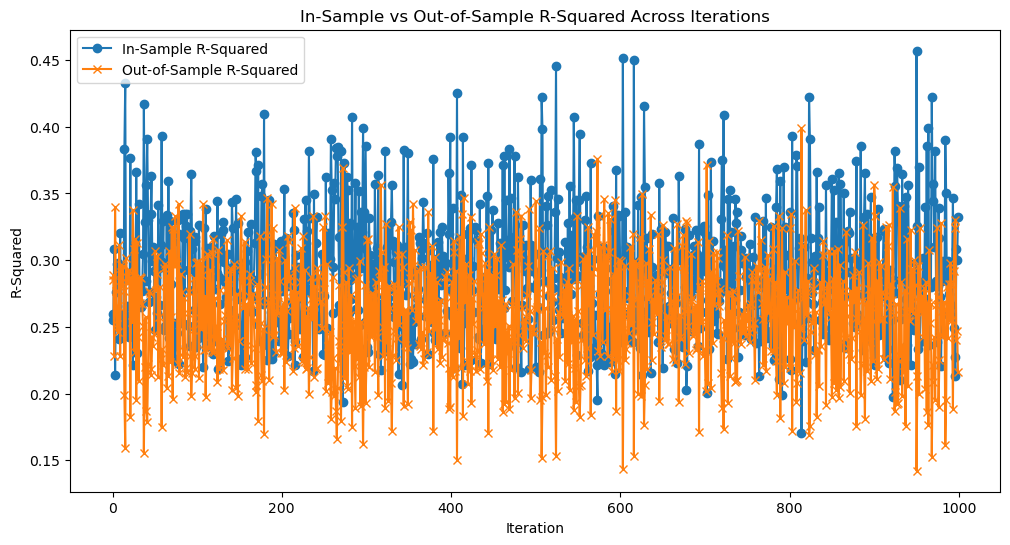

In [26]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url)

model_formula = 'HP ~ Attack + Defense + Speed + Legendary + Q("Sp. Def") + Q("Sp. Atk")'

in_sample_r_squared = []
out_of_sample_r_squared = []

num_iterations = 1000

for i in range(num_iterations):
    train_data, test_data = train_test_split(pokeaman, train_size=0.5)
    
    model_spec = smf.ols(formula=model_formula, data=train_data)
    model_fit = model_spec.fit()
    
    # Predict on the test data
    yhat_test = model_fit.predict(test_data)
    y_test = test_data['HP']
    
    # Compute "in-sample" R-squared
    in_sample_r_squared.append(model_fit.rsquared)
    
    # Compute "out-of-sample" R-squared
    out_sample_r2 = np.corrcoef(y_test, yhat_test)[0, 1]**2
    out_of_sample_r_squared.append(out_sample_r2)

# Convert results to DataFrame for easier visualization
results_df = pd.DataFrame({
    'In-Sample R-Squared': in_sample_r_squared,
    'Out-of-Sample R-Squared': out_of_sample_r_squared
})

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(results_df['In-Sample R-Squared'], label='In-Sample R-Squared', marker='o')
plt.plot(results_df['Out-of-Sample R-Squared'], label='Out-of-Sample R-Squared', marker='x')
plt.xlabel('Iteration')
plt.ylabel('R-Squared')
plt.title('In-Sample vs Out-of-Sample R-Squared Across Iterations')
plt.legend()
plt.show

Question 9

In the first code, it takes the original model7 formula and fitting it only on Generation 1 Pokémon (Generation == 1). Then it calculates the in-sample and out-of-sample R-squared values for gen 1. This illustrates how much the model is trained on gen 1 pokemon can predict for pokemon for other generations.

In the second code, it is evaluating how well the Pokémon data from Generations 1 to 5 generalizes to Generation 6. The formula model7_linear_form is used to fit a model using data from Generations 1 through 5 (excluding Generation 6) with pokeaman[pokeaman.Generation!=6], then it calculates the in-sample R-squared value for generations 1-5, then it calculates the R-squared value for out-of-sample(gen 6). By camparing the R-squared values, we can determine how well the model can generalize to future or unseen data.

In the third code, it is evaluating how well the Pokémon data from Generation 1 generalizes to the other generations. After the model is fitted to generation 1, it calculates the: 'In sample' R-squared value on all generations, 'Out of sample' R-squared value for all generations, 'In sample' R-squared: (gen1_predict_future) value, and the 'Out of sample' R-squared: (gen1_predict_future) value. From here, we can assess if the model trained on Generation 1 data is not capturing enough generalizable patterns to make accurate predictions for other generations.

In the fourth code, it is training the model on data from Generations 1 to 5 (pokeaman[pokeaman.Generation != 6]) and testing it on Generation 6 data (pokeaman[pokeaman.Generation == 6]). Then it computes the following: 'In sample' R-squared: (original), 'Out of sample' R-squared: (original), 'In sample' R-squared: (gen1to5_predict_future), and 'Out of sample' R-squared: (gen1to5_predict_future). By comparing the different R-squared values, it can show if the model is overfitting to the specific generations it was trained on, or if it can generalize to new data from other generations.

### Our Conversation about Linear Regression

This conversation has explored the application and interpretation of various linear regression models, moving from **Simple Linear Regression** to **Multiple Linear Regression**.

*   The conversation began with a comparison between simple linear regression models using a continuous predictor variable and those using an indicator variable.
    *   **Simple Linear Regression with a continuous predictor** models data with a single straight line. Its **slope coefficient** represents the average change in the outcome variable for a one-unit increase in the continuous predictor variable. 
    *   **Simple Linear Regression with an indicator variable** models two populations with potentially different means but a common variance. This results in two parallel lines with identical slopes but distinct intercepts. 
*   The conversation then explored adding an indicator variable to a Simple Linear Regression model with a continuous predictor, resulting in a **Multiple Linear Regression** model.
    *   This results in a model with **parallel lines**, where each line corresponds to a group represented by the indicator variable. 
    *   All groups share the same **slope**, representing the average change in the outcome for a one-unit increase in the continuous predictor variable while keeping the indicator variable constant.
    *   The **coefficient of the indicator variable** signifies the average difference in the outcome variable between the groups represented by the indicator variable while holding the continuous predictor constant. 
*   Next, the conversation considered the impact of including an **interaction** between a continuous predictor and an indicator variable in a Multiple Linear Regression model.
    *   Such interactions allow the **slope** of the relationship between the outcome variable and the continuous predictor variable to vary between groups represented by the indicator variable. This creates a "non-parallel lines" pattern. 
    *   The **indicator variable's coefficient** continues to denote the average difference between groups while holding the continuous predictor constant. However, the model introduces additional coefficients that quantify how the influence of the continuous predictor variable on the outcome variable changes in different groups compared to the baseline group. 
*   Finally, the conversation examined the behavior of a Multiple Linear Regression model that exclusively uses indicator variables derived from a non-binary categorical variable. 
    *   This type of model describes multiple groups that might have different means but share a common variance. It generates a set of **parallel lines with slopes of zero and varying intercepts**. 
    *   The indicator variables act as binary encodings, and their coefficients represent the mean differences between each group and the baseline group. 
    *   The sources and the conversation highlighted that using two binary indicator variables is sufficient to represent a categorical variable with three levels, such as "A", "B", and "C". The third group's information can be inferred from the first two indicator variables.

The conversation also explored interpreting model results, particularly when **coefficients are large with strong evidence against the null hypothesis** but the model has a **low R-squared** value.

*   A low **R-squared**, such as 17.6%, indicates the model explains only a small proportion of the variability in the outcome variable, despite having statistically significant predictors. The sources note that an **R-squared** of 0.7 means that 70% of the "variation" in the "dependent" outcome variable is "explained" by the model.
*   The sources and the conversation explored several possible reasons for this situation:
    *   The model may be missing key predictor variables.
    *   Relationships between predictors and the outcome variable could be non-linear.
    *   The outcome variable might inherently have high variability. 
    *   Interactions between predictors not accounted for in the model might be present.

The conversation emphasized the importance of **model diagnostics** to evaluate the assumptions of a linear regression model using the **residuals**. The sources discuss checking assumptions like normality, heteroskedasticity, and linearity to ensure the reliability of the model's results. 

The conversation provided a comprehensive overview of various linear regression models, illustrating their behavior and interpretation across different scenarios. It highlighted the importance of understanding how different variable types and interactions influence the model's structure and interpretation. The conversation underscored the need for carefully considering the model's limitations and interpreting the results in the context of the research question and data characteristics. 


Here’s a summary of our interactions starting from the prompt "What are some pros to multiple linear regression as opposed to simple linear regression?":

1. **Multiple Linear Regression vs Simple Linear Regression**: You asked about the pros of multiple linear regression over simple linear regression. I explained that multiple linear regression allows for modeling relationships between a dependent variable and multiple independent variables, offering a more comprehensive understanding of the data compared to simple linear regression, which only includes one independent variable.

2. **Regression Model Analysis**: You proceeded to work on a regression model for your project using survey data. You explored various aspects of the data, such as categorical variables like **WELLNESS_gad_anxious**, and you encountered challenges in fitting the model correctly due to issues with variable references (e.g., `DEMO_gender_Male`), leading to errors during model fitting.

3. **Categorical Variables and Dummy Variables**: You were working with categorical variables, including demographic variables such as gender and age, and converting them into dummy variables for regression analysis. You experienced issues with missing or incorrectly referenced column names and received guidance on correctly referencing dummy variables in the regression formula.

4. **Data Preprocessing Challenges**: You dealt with challenges around data preprocessing, including handling missing values and ensuring that categorical variables were properly transformed for use in multiple regression models.

5. **Model Fit and Error Handling**: While fitting models, you encountered errors, such as missing variable definitions or formula misconfigurations. We discussed these errors, and I helped you troubleshoot by reviewing the dataset and making sure the correct column names and data transformations were used.

6. **Regression Model Testing**: You also explored regression diagnostics, including checking residuals for normality and handling model assumptions like multicollinearity. This process led to further refinements in your approach to analyzing the data.

7. **Technical Assistance**: Along the way, you received assistance in interpreting p-values, confidence intervals, and the results of hypothesis tests within your regression analysis.

This process has been iterative, focusing on improving model performance and interpreting results from your dataset. Would you like to dive deeper into any specific point from our interactions?

https://chatgpt.com/share/6736c618-8864-8011-9746-de0e4c2c0b74